# Qiskit 與量子機器學習教學

量子機器學習（Quantum Machine Learning, QML）是結合量子計算和機器學習的一個前沿領域。使用 Qiskit，可以在 IBM 的量子電腦上實現量子機器學習算法。這篇教學將帶領你從基本的 Qiskit 概念到實現簡單的量子機器學習模型。

## 目標
1. 了解 Qiskit 的基本概念。
2. 使用 Qiskit 建立和運行量子電路。
3. 實現一個簡單的量子機器學習模型。

## 先決條件
- 熟悉 Python。
- 了解基本的線性代數和機器學習概念。

## 環境設置
首先，確保你已經安裝 Qiskit。你可以通過 pip 安裝：

In [32]:
!pip install qiskit
!pip install matplotlib
!pip install -U scikit-learn
!pip install qiskit-aqua
!pip install qiskit-machine-learning

## 第一步：了解 Qiskit 基本概念

Qiskit 是一個 Python 框架，用於創建和操作量子電路。我們從一些基本的 Qiskit 概念開始。

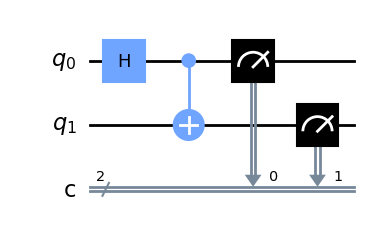

In [33]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram

# 創建一個量子電路，有 2 個量子位和 2 個經典位
qc = QuantumCircuit(2, 2)

# 添加一些量子門操作
qc.h(0)  # 在第 0 個量子位上添加 Hadamard 門
qc.cx(0, 1)  # 在第 0 和第 1 個量子位上添加 CNOT 門

# 測量量子位
qc.measure([0, 1], [0, 1])

# 畫出量子電路
qc.draw('mpl')

## 第二步：運行量子電路

使用 Qiskit 的 Aer 模塊來模擬量子電路並查看結果。

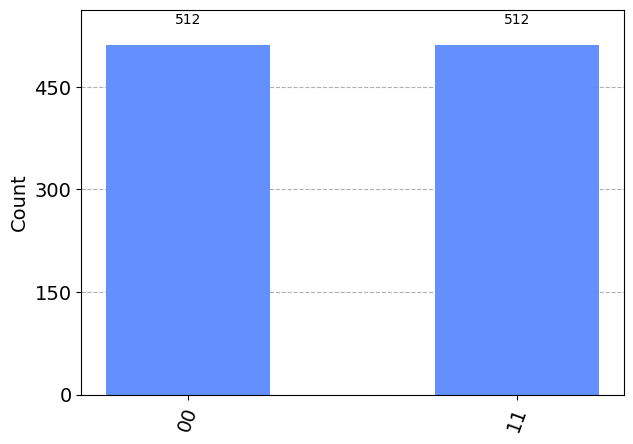

In [34]:
# 使用 Aer 模擬器運行量子電路
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = execute(compiled_circuit, simulator).result()

# 獲取結果並繪製直方圖
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)

## 第三步：量子機器學習

在這裡，我們將實現一個簡單的量子分類器。

### 數據準備

首先，我們需要準備一些簡單的數據。

In [35]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 創建二分類數據集
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X)
print(y)

[[ 0.55942643  2.38869353]
 [ 1.31217492 -0.7173148 ]
 [-1.5598485  -1.92487377]
 [-2.2813861  -0.1368559 ]
 [ 1.56070438 -0.42795824]
 [-0.80804463  1.19664076]
 [-0.27062383 -2.25553963]
 [ 0.480502    0.54914434]
 [-1.20757158 -1.26898369]
 [ 0.25415746 -1.79532002]
 [ 2.59123946  0.24472415]
 [ 0.07123641  0.49429823]
 [-1.17762637 -1.20592943]
 [ 0.93343952  0.68811892]
 [ 1.65214494 -0.35885569]
 [-1.40735658 -1.56826626]
 [ 1.02255619 -1.08324727]
 [-0.81680628 -0.6795874 ]
 [ 1.50575249 -0.38919817]
 [-2.17105282 -0.04862909]
 [ 0.71479373 -1.42922002]
 [-0.15013844 -0.11708689]
 [-1.4117586  -1.5332749 ]
 [-2.58590856 -0.40925706]
 [ 0.82600732 -1.05383855]
 [-0.07133524  0.08896214]
 [ 0.6273745  -1.32933233]
 [ 1.65882246 -0.43131517]
 [ 1.2798899   1.25896077]
 [ 0.25058844  0.13979096]
 [-0.05319823  1.85605469]
 [-2.05832072 -2.52343407]
 [-2.02632079  0.06194498]
 [-1.65830375 -1.57127256]
 [ 1.28008347  1.28938375]
 [ 0.96423311  0.55600276]
 [-1.87653774  0.23085877]
 

### 量子特徵映射

我們使用 Qiskit 的量子特徵映射（Quantum Feature Map）來將經典數據映射到量子狀態。

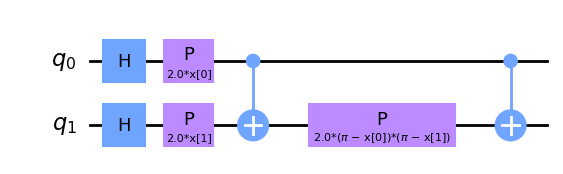

In [36]:
from qiskit.circuit.library import ZZFeatureMap

# 創建一個兩量子位的 ZZ 特徵映射
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)

# 繪製特徵映射
feature_map.decompose().draw('mpl')

### 量子分類器

我們將使用參數化量子電路（Parameterized Quantum Circuit）作為分類器。

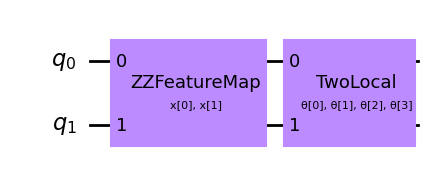

In [39]:
from qiskit.circuit import Parameter
from qiskit.circuit.library import TwoLocal

# 創建一個兩量子位的參數化量子電路
params = [Parameter('θ{}'.format(i)) for i in range(4)]
var_form = TwoLocal(2, 'ry', 'cz', reps=1)
qc = QuantumCircuit(2)

# 添加特徵映射和參數化量子電路
qc.compose(feature_map, inplace=True)
qc.compose(var_form, inplace=True)

# 繪製參數化量子電路
qc.draw('mpl')

### 訓練量子分類器

使用經典優化算法來訓練量子分類器。

In [38]:
import numpy as np
from qiskit import Aer, transpile, execute
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.algorithms.optimizers import COBYLA

# 初始化量子模擬器
simulator = Aer.get_backend('qasm_simulator')

# 定義帶有參數的量子電路
params = [Parameter(f'θ{i}') for i in range(2)]
qc = QuantumCircuit(2)
qc.ry(params[0], 0)
qc.cx(0, 1)
qc.ry(params[1], 1)
qc.measure_all()

# 定義目標函數
def objective_function(params):
    qc_with_params = qc.bind_parameters(params)
    compiled_circuit = transpile(qc_with_params, simulator)
    result = execute(compiled_circuit, simulator, shots=1024).result()
    counts = result.get_counts()
    # 計算分類準確率（這裡簡單計算）
    return -counts.get('00', 0) / 1024

# 使用 COBYLA 優化器
optimizer = COBYLA(maxiter=200, tol=0.001)
initial_point = np.random.rand(len(params))

# 優化目標函數
result = optimizer.minimize(fun=objective_function, x0=initial_point)

# 最佳參數
optimal_params = result.x
print("最佳參數: ", optimal_params)


最佳參數:  [-0.03623632 -0.02983169]


### 量子SVM

X_train shape: (200, 2)
y_train shape: (200, 2)
X_test shape: (40, 2)
y_test shape: (40, 2)
Train Accuracy: 71.00%
Test Accuracy: 60.00%


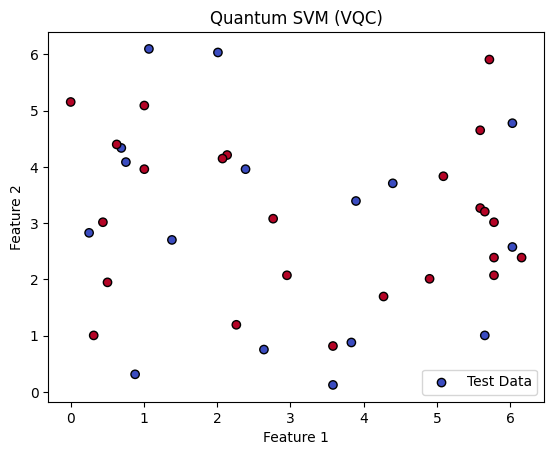

In [73]:
import numpy as np
from qiskit import Aer
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.algorithms.optimizers import COBYLA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 生成資料集
feature_dim = 2  # 特徵的維度
train_size, test_size = 10000, 1000
X_train, y_train, X_test, y_test = ad_hoc_data(
    training_size=train_size, test_size=test_size, n=feature_dim, gap=0.3
)

# 打印資料集的形狀以檢查是否符合預期
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# 量子特徵映射和變分形式
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement='linear')
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=1)

# 設置量子實例
sampler = Sampler()

# 定義變分量子分類器
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(), sampler=sampler)

print("================")
# 訓練模型
vqc.fit(X_train, y_train)

print("================")

# 預測測試資料
y_pred_train = vqc.predict(X_train)
y_pred_test = vqc.predict(X_test)

# 將編碼的預測結果轉換回標籤
y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

# 計算準確率
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_train_labels)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_test_labels)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# 繪製分類結果
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test_labels, cmap='coolwarm', edgecolors='k', label='Test Data')
plt.title("Quantum SVM (VQC)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
